# Relatório Projeto SuperComp : Maratona de Filmes

###### Aluno: João Vitor Menezes de Magalhães


## Problema dado:

Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

Entrada: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

Saída: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

### Input do projeto

Para definir a quantidadade de filmes, categorias e restrições, foi utilizado o gerador de inputs fornecido no site da disciplina.

Segue um arquivo input.txt gerado pelo código fornecido como exemplo:

```
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
10 14 1
11 17 2
11 14 3
13 15 3
14 15 1
12 16 4
12 13 4
```
* a primeira linha indica que há 10 filmes a serem considerados e 4 categorias;
* a segunda linha indica qual o máximo de filmes que cada categoria pode ter;
* da terceira linha em diante você vai encontrar os n filmes, suas respectivas hora de início, hora de término e categoria pertencente.




## Heurística Gulosa

A primeira implementação da heurística para nosso projeto consiste em uma implementação gulosa (Greedy). Essa heurística tem como objetivo principal buscar uma solução global ótima.

Dessa forma para iniciar a implementação, fiz algumas escolhas de filtros a entrada para atingir o resultado que era necessário.

1. Os filmes que terminam 00:00 (meia-noite), deverão mudar para 24:00, já que os filmes só podem ser assistidos em um dia.


2. Os filmes que terminam em um horário depois que começa, por exemplo, começa 23:00 e acaba 2:00, vão ser retirados já que os filmes só podem ser assistidos em um dia


3. Escolhi ordenar os filmes em ordem crescente do horário de fim, para que assim, os filmes que terminam primeiro sejam priorizados 

### Implementação

#### Eurística Gulosa

Para começar a implementação fiz uma struct para tratar os filmes:

``` c++
struct movies {
    int start_time;
    int end_time;
    int category;
};
```

A função reserve_movie_time é uma função que recebe um bitset (um vetor de bits) que representa os horários de todos os filmes já selecionados, bem como o horário de início e término de um novo filme. Ele define bits no bitset para 1 nos horários correspondentes ao novo filme e retorna o bitset atualizado.

``` c++
bitset<24> reserve_movie_time(const bitset<24>& current_bitset, int start_time, int end_time) {

    bitset<24> timestamp_bitset = current_bitset;

    // Set the bits corresponding to the movie time slots to 1
    for (int i = start_time; i < end_time; i++) {
        timestamp_bitset.set(i, 1);
    }

    return timestamp_bitset;
}
```

A função compare_movies_by_end_time é uma função auxiliar usada para classificar a lista de filmes por horário de término.

``` c++
bool compare_movies_by_end_time(const movies& a, const movies& b) {
    return a.end_time < b.end_time;
}
```

A função check_movie_time verifica se o horário do novo filme entra em conflito com os horários de outros filmes já selecionados. Ele verifica se os bits correspondentes aos horários do novo filme no bitset são 0 ou 1.

``` c++
bool check_movie_time(bitset<24>& timestamp_bitset, movies movie){
    for (int i = movie.start_time; i < movie.end_time; i++){
        if (timestamp_bitset[i] == 1){
            return false;
        }
    }
    return true;
}
```

A função greedy_algorithm é a função principal do programa. Ele recebe uma lista de todos os filmes disponíveis e um vetor que especifica o número máximo de filmes permitidos em cada categoria. Ele seleciona um conjunto de filmes que respeitam as restrições especificadas no início deste texto. Ele usa as funções check_movie_time e reserve_movie_time para verificar e reservar horários de filmes, respectivamente.

``` c++
vector<movies> greedy_algorithm(vector<movies> vector_movies, vector<int> max_movies_per_cat) {

    vector<movies> selected_movies;
    bitset<24> timestamp_bitset;
    

    for (int i = 0; i < vector_movies.size(); i++) {
        if (max_movies_per_cat[vector_movies[i].category-1] > 0) {
            
            if (check_movie_time(timestamp_bitset, vector_movies[i]) == true) {
                selected_movies.push_back(vector_movies[i]);
                timestamp_bitset = reserve_movie_time(timestamp_bitset, vector_movies[i].start_time, vector_movies[i].end_time);
                max_movies_per_cat[vector_movies[i].category-1]--;
            }
        }
    }

    return selected_movies;
}
```

Por fim, a função main é a função principal que lê o arquivo de entrada, chama a função greedy_algorithm, imprime o número total de filmes selecionados e, em seguida, imprime as informações sobre cada filme selecionado (horário de início, horário de término e categoria).

``` c++
int main(int argc, char* argv[]) {
    if (argc != 2) {
        cout << "Usage: " << argv[0] << " <filename>" << endl;
        return 1;
    }

    string filename = argv[1];
    int num_movies, num_cat;
    int max_movies_cat;
    int start_time, end_time, category;
    movies movie;
    vector<int> max_movies_per_cat;
    vector<movies> vector_movies;

    ifstream infile(filename);

    if (!infile) {
        cout << "Error opening file: " << filename << endl;
        return 1;
    }

    infile >> num_movies >> num_cat;

    for (int i = 0; i < num_cat; i++) {
        infile >> max_movies_cat;
        max_movies_per_cat.push_back(max_movies_cat);
    }

    for (int i = 0; i < num_movies; i++) {
        infile >> movie.start_time >> movie.end_time >> movie.category;
        if (movie.start_time == 24 || movie.end_time == 24) {
            movie.start_time = 0;
        }
        if (movie.start_time > movie.end_time || movie.start_time == movie.end_time) {
            continue;
        }
        vector_movies.push_back(movie);
    }

    sort(vector_movies.begin(), vector_movies.end(), compare_movies_by_end_time);

    vector<movies> selected_movies = greedy_algorithm(vector_movies, max_movies_per_cat);

    cout << "Total filmes: " << selected_movies.size() << endl;

    for (int i = 0; i < selected_movies.size(); i++) {
        cout << selected_movies[i].start_time << " " << selected_movies[i].end_time << " " << selected_movies[i].category << endl;
    }

    infile.close();

    return 0;
}

```


#### Aleatoriedade



In [50]:
import pandas as pd
def filmes_escolhidos(file):
    with open(file, 'r') as f:
        line = f.readline()
        filmes = line.split(':')
        return int(filmes[1])
    
qnt_filmes = [1000,100000, 500000, 1000000, 10000000]
qnt_categorias = [5,10,20,40]

for i in qnt_filmes:
    for j in qnt_categorias:
        !./input {i} {j}
        !mv input.txt Inputs/input-{i}-{j}.txt        

In [52]:
import time
runtime_gulosa = {}
filmes_gulosa = {}
for i in qnt_filmes:
    for j in qnt_categorias:
        key = '{}-{}'.format(i, j)
        if key not in runtime_gulosa:
            runtime_gulosa[key] = []
        if key not in filmes_gulosa:
            filmes_gulosa[key] = []
        start_time = time.time()
        !./gulosa < Inputs/input-{i}-{j}.txt > Outputs/outgulosa-{i}-{j}.txt
        runtime = time.time() - start_time
        runtime_gulosa[key].append(runtime)
        filmes_gulosa[key].append(filmes_escolhidos(f'Outputs/outgulosa-{i}-{j}.txt'))

In [53]:
import time
runtime_aleatoriedade = {}
filmes_aleatoriedade = {}
for i in qnt_filmes:
    for j in qnt_categorias:
        key = '{}-{}'.format(i, j)
        if key not in runtime_aleatoriedade:
            runtime_aleatoriedade[key] = []
        if key not in filmes_aleatoriedade:
            filmes_aleatoriedade[key] = []
        start_time = time.time()
        !./aleatoriedade < Inputs/input-{i}-{j}.txt > Outputs/outaleatorio-{i}-{j}.txt
        runtime = time.time() - start_time
        runtime_aleatoriedade[key].append(runtime)
        filmes_aleatoriedade[key].append(filmes_escolhidos(f'Outputs/outaleatorio-{i}-{j}.txt'))

In [57]:
    
tempo_guloso = pd.DataFrame.from_dict(runtime_gulosa)
tempo_aleatorio = pd.DataFrame.from_dict(runtime_aleatoriedade)
resultado_guloso = pd.DataFrame.from_dict(filmes_gulosa)
resultado_aleatorio = pd.DataFrame.from_dict(filmes_aleatoriedade)




In [58]:

tempo_guloso 


,1000-5,1000-10,1000-20,1000-40,100000-5,100000-10,100000-20,100000-40,500000-5,500000-10,500000-20,500000-40,1000000-5,1000000-10,1000000-20,1000000-40,10000000-5,10000000-10,10000000-20,10000000-40
0,0.122659,0.122125,0.123401,0.12164,0.195071,0.203127,0.205214,0.222021,0.507288,0.51158,0.51781,0.568028,0.906786,0.914737,0.895318,0.898679,8.26288,8.189979,8.382084,9.378153


In [59]:
tempo_aleatorio 


,1000-5,1000-10,1000-20,1000-40,100000-5,100000-10,100000-20,100000-40,500000-5,500000-10,500000-20,500000-40,1000000-5,1000000-10,1000000-20,1000000-40,10000000-5,10000000-10,10000000-20,10000000-40
0,0.123154,0.121098,0.12124,0.121753,0.202281,0.20405,0.203982,0.207566,0.572412,0.531449,0.56136,0.567211,0.997914,1.068246,1.007243,0.977541,9.139018,9.457118,9.73748,10.086071


In [60]:
resultado_guloso 


,1000-5,1000-10,1000-20,1000-40,100000-5,100000-10,100000-20,100000-40,500000-5,500000-10,500000-20,500000-40,1000000-5,1000000-10,1000000-20,1000000-40,10000000-5,10000000-10,10000000-20,10000000-40
0,14,21,22,23,13,24,24,24,14,24,24,24,15,24,24,24,15,24,24,24


In [78]:
resultado_aleatorio

,1000-5,1000-10,1000-20,1000-40,100000-5,100000-10,100000-20,100000-40,500000-5,500000-10,500000-20,500000-40,1000000-5,1000000-10,1000000-20,1000000-40,10000000-5,10000000-10,10000000-20,10000000-40
0,12,12,9,12,12,12,12,13,12,14,12,10,14,10,13,10,13,13,12,14


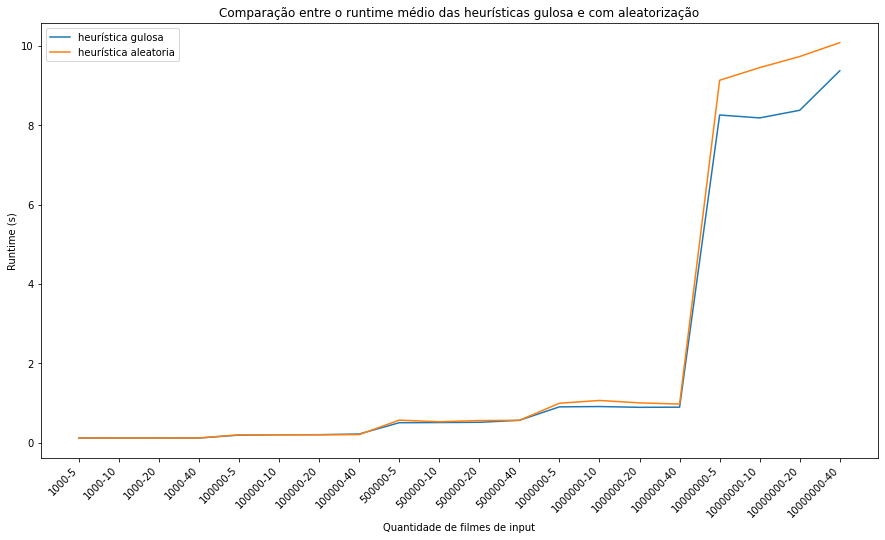

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=tempo_guloso.T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(data=tempo_aleatorio.T.reset_index(), x='index', y=0, label='heurística aleatoria')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Quantidade de filmes de input')
plt.ylabel('Runtime (s)')
plt.title('Comparação entre o runtime médio das heurísticas gulosa e com aleatorização')
plt.legend()
plt.show()

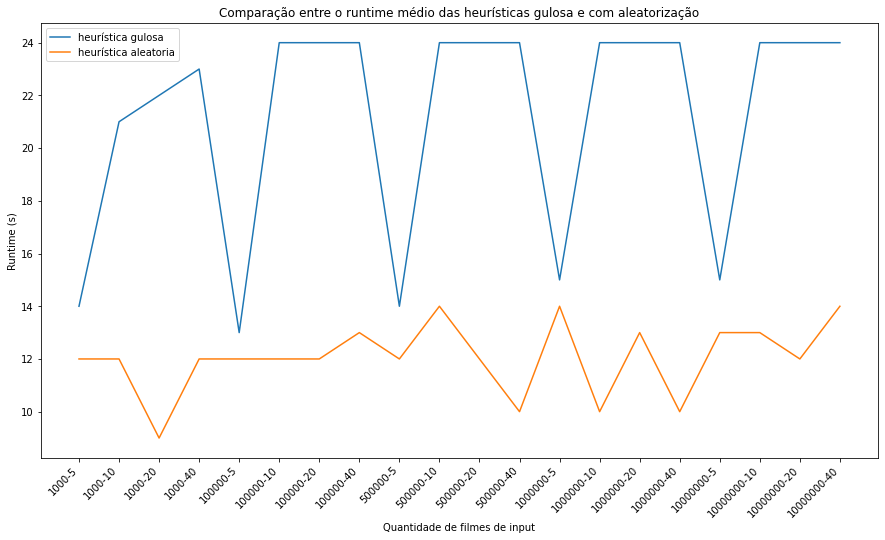

In [87]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=resultado_guloso.T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(data=resultado_aleatorio.T.reset_index(), x='index', y=0, label='heurística aleatoria')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Quantidade de filmes de input')
plt.ylabel('Runtime (s)')
plt.title('Comparação entre o runtime médio das heurísticas gulosa e com aleatorização')
plt.legend()
plt.show()

<AxesSubplot:xlabel='index', ylabel='0'>

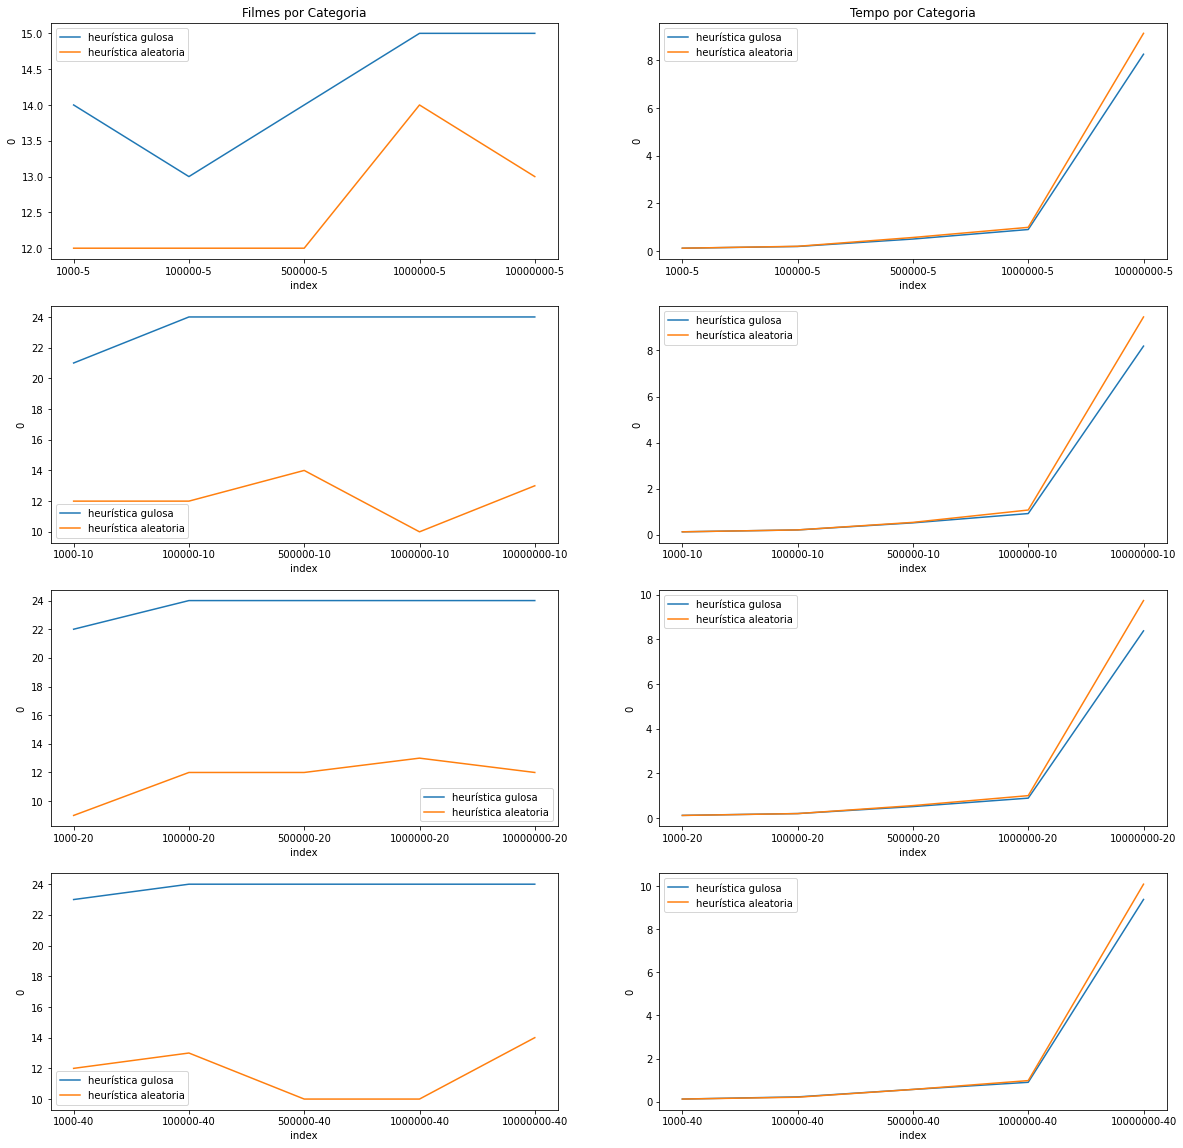

In [128]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
sns.lineplot(ax=axes[0,0],data=resultado_guloso.filter(regex='-5$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[0,0],data=resultado_aleatorio.filter(regex='-5$').T.reset_index(), x='index', y=0, label='heurística aleatoria')
axes[0,0].set(title='Filmes por Categoria')

sns.lineplot(ax=axes[1,0],data=resultado_guloso.filter(regex='-10$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[1,0],data=resultado_aleatorio.filter(regex='-10$').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[2,0],data=resultado_guloso.filter(regex='-20$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[2,0],data=resultado_aleatorio.filter(regex='-20$').T.reset_index(), x='index', y=0, label='heurística aleatoria')

sns.lineplot(ax=axes[3,0],data=resultado_guloso.filter(regex='-40$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[3,0],data=resultado_aleatorio.filter(regex='-40$').T.reset_index(), x='index', y=0, label='heurística aleatoria')

sns.lineplot(ax=axes[0,1],data=tempo_guloso.filter(regex='-5$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[0,1],data=tempo_aleatorio.filter(regex='-5$').T.reset_index(), x='index', y=0, label='heurística aleatoria')
axes[0,1].set(title='Tempo por Categoria')

sns.lineplot(ax=axes[1,1],data=tempo_guloso.filter(regex='-10$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[1,1],data=tempo_aleatorio.filter(regex='-10$').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[2,1],data=tempo_guloso.filter(regex='-20$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[2,1],data=tempo_aleatorio.filter(regex='-20$').T.reset_index(), x='index', y=0, label='heurística aleatoria')


sns.lineplot(ax=axes[3,1],data=tempo_guloso.filter(regex='-40$').T.reset_index(), x='index', y=0, label='heurística gulosa')
sns.lineplot(ax=axes[3,1],data=tempo_aleatorio.filter(regex='-40$').T.reset_index(), x='index', y=0, label='heurística aleatoria')

In [136]:
!valgrind --tool=callgrind ./gulosa < Inputs/input-100000-5.txt

==22868== Callgrind, a call-graph generating cache profiler
==22868== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==22868== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==22868== Command: ./gulosa
==22868== 
==22868== For interactive control, run 'callgrind_control -h'.
Número de filmes:13
0 1 3
1 2 4
2 3 1
3 4 1
4 5 5
5 6 2
6 7 1
7 8 5
8 9 4
9 10 4
10 11 4
11 12 5
12 13 5
==22868== 
==22868== Events    : Ir
==22868== Collected : 364965605
==22868== 
==22868== I   refs:      364,965,605


In [137]:
!callgrind_annotate --show-percs=yes callgrind.out.22868 gulosa.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.22868' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 78451646
Trigger: Program termination
Profiled target:  ./gulosa (PID 22868, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   gulosa.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir                   
--------------------------------------------------------------------------------
364,965,605 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                   file:function
--------------------------------------------------------------------------------
73,992,544 (20.27%)  ???:std::istreambuf_iterator<c

In [141]:
!valgrind --tool=callgrind ./aleatoriedade < Inputs/input-100000-5.txt

==22954== Callgrind, a call-graph generating cache profiler
==22954== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==22954== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==22954== Command: ./aleatoriedade
==22954== 
==22954== For interactive control, run 'callgrind_control -h'.
Número de filmes:12
0 1 3
1 2 4
2 4 1
4 6 5
6 7 1
7 9 5
9 12 5
12 16 4
16 17 4
17 21 4
21 23 1
23 24 2
==22954== 
==22954== Events    : Ir
==22954== Collected : 609582727
==22954== 
==22954== I   refs:      609,582,727


In [142]:
!callgrind_annotate --show-percs=yes callgrind.out.22954 aleatoriedade.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.22954' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 111452277
Trigger: Program termination
Profiled target:  ./aleatoriedade (PID 22954, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   aleatoriedade.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir                   
--------------------------------------------------------------------------------
609,582,727 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                   file:function
--------------------------------------------------------------------------------
73,992,544 (12.14%)  ???:std::istrea